# Implementation of PCA color augmentation

Referece: [ImageNet Classification with Deep Convolutional
Neural Networks](https://www.nvidia.cn/content/tesla/pdf/machine-learning/imagenet-classification-with-deep-convolutional-nn.pdf)

In [1]:
from sklearn.datasets import load_sample_images
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline

In [2]:
# use 2 simple images from sklearn as example, can be easily extended to large dataset

sample_img = [I / 255 for I in load_sample_images().images]

print('Number of Images: ', len(sample_img))
print('Dimension of Images: ', [I.shape for I in sample_img])

Number of Images:  2
Dimension of Images:  [(427, 640, 3), (427, 640, 3)]


# Raw Images

0.563538146133
0.242762437625


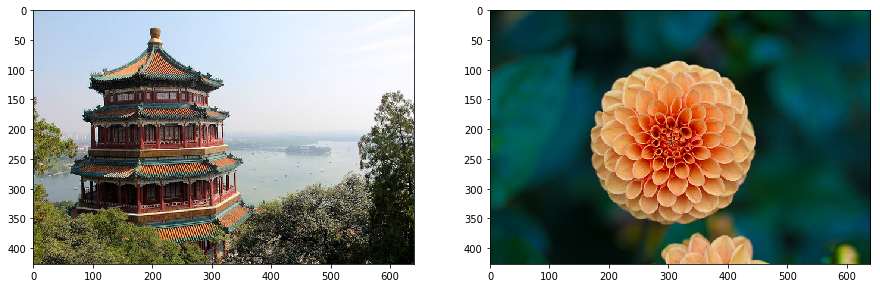

In [3]:
for I in sample_img:
    print(I.mean())

f, ax = plt.subplots(1, 2, figsize=(15, 30))
ax[0].imshow(sample_img[0])
ax[1].imshow(sample_img[1])

In [4]:
# stack all pixels, calculate covariane matrix, and then compute eigenvalues & eigenvectors
X = np.vstack([I.reshape(I.shape[0] * I.shape[1], 3) for I in sample_img])
m = X.mean(axis=0)
Cov = ((X - m).T.dot(X - m)) / X.shape[0]
lamb, P = np.linalg.eig(Cov)

def pcf_color_augmentation(image, lamb, P):
    pertub = P.dot((lamb * np.random.normal(0, 0.1, 3)).reshape(3,1))
    return np.minimum(np.maximum(image + pertub.reshape(3,), 0), 1)

# Augmented Images

Slightly different from the raw images.

0.548422914492
0.222299166179


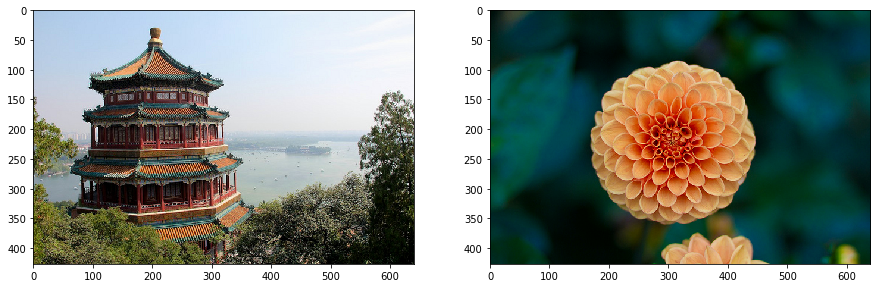

In [5]:
aug_img = [pcf_color_augmentation(I, lamb, P) for I in sample_img]

for I in aug_img:
    print(I.mean())

f, ax = plt.subplots(1, 2, figsize=(15, 30))
ax[0].imshow(aug_img[0])
ax[1].imshow(aug_img[1])